**Ahsanul Haque Farhan | P2648986**

In [ ]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt

**Configuration**

In [ ]:
# df= pd.read_csv('./sample_data/customer_churn.csv')
# df 



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df= pd.read_csv('drive/MyDrive/customer_churn.csv')
df

Mounted at /content/drive


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,649.7820,122.1980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,235.0890,76.1210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,252.2880,78.0320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,969.8760,157.7640,0


**Rename** **columns**

In [ ]:
#Upper case to lower case
#space replace with '_' underscore
#add/replace with human readable name

df = df.rename(columns={"Call  Failure"        : "call_failure",
                      "Complains"              : "complains", 
                      "Subscription  Length"   : "subs_length", 
                      "Charge  Amount"         : "charge_amount",
                      "Seconds of Use"         : "total_seconds_calls",
                      "Frequency of use"       : "total_number_calls", 
                      "Frequency of SMS"       : "total_number_sms", 
                      "Distinct Called Numbers": "distinct_call_numbers",
                      "Age Group"              : "age_group", 
                      "Tariff Plan"            : "tariff_plan", 
                      "Status"                 : "status", 
                      "Age"                    : "age", 
                      "Customer Value"         : "customer_value" })

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   call_failure           3150 non-null   int64  
 1   complains              3150 non-null   int64  
 2   subs_length            3150 non-null   int64  
 3   charge_amount          3150 non-null   int64  
 4   total_seconds_calls    3150 non-null   int64  
 5   total_number_calls     3150 non-null   int64  
 6   total_number_sms       3150 non-null   int64  
 7   distinct_call_numbers  3150 non-null   int64  
 8   age_group              3150 non-null   int64  
 9   tariff_plan            3150 non-null   int64  
 10  status                 3150 non-null   int64  
 11  age                    3150 non-null   int64  
 12  customer_value         3150 non-null   float64
 13  FN                     3150 non-null   float64
 14  FP                     3150 non-null   float64
 15  Chur

In [ ]:
df.agg(['count', 'size', 'nunique'])

,call_failure,complains,subs_length,charge_amount,total_seconds_calls,total_number_calls,total_number_sms,distinct_call_numbers,age_group,tariff_plan,status,age,customer_value,FN,FP,Churn
count,3150,3150,3150,3150,3150,3150,3150,3150,3150,3150,3150,3150,3150,3150,3150,3150
size,3150,3150,3150,3150,3150,3150,3150,3150,3150,3150,3150,3150,3150,3150,3150,3150
nunique,37,2,45,11,1756,242,405,92,5,2,2,5,2654,2654,2195,2


**Percantages of** **Churn**

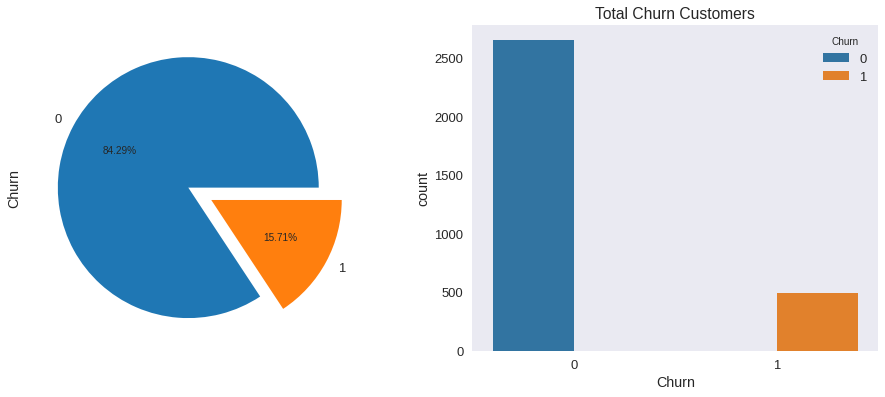

In [ ]:
plt.style.use(['seaborn-dark','seaborn-talk'])

fig, ax = plt.subplots(1,2,figsize=(16,6))

ChurnValue = df['Churn'].value_counts()

ChurnValue.plot.pie(explode=[0,0.2], ax=ax[0], autopct='%1.2f%%')
plt.title('Total Churn Percentages')

sns.countplot(x="Churn", hue="Churn", data=df)
plt.title('Total Churn Customers')

plt.show()

According to above figures, 15.71% customer decided to terminate this company

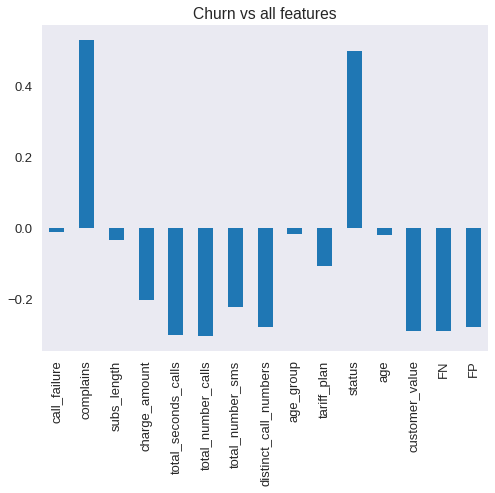

In [ ]:
#feature importance using corr
df.drop('Churn', axis=1).corrwith(df.Churn).plot(kind='bar', figsize=(8, 6), title="Churn vs all features")

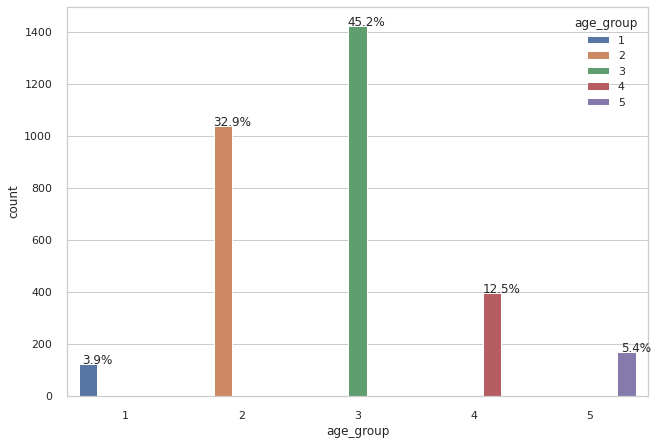

In [ ]:
total = float(len(df))

sns.set(style="whitegrid")
ax = sns.countplot(x="age_group", hue="age_group", data=df)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [ ]:
plt.scatter(df.subs_length[df.Churn==0],df.age_group[df.Churn==0], c='lightblue') #non churn customers
plt.scatter(df.subs_length[df.Churn==1],df.age_group[df.Churn==1], c='salmon') #churn customers
plt.title('Age Group vs Subscription_Length')
plt.ylabel('Age Group')
plt.xlabel('Subscription_Length')
plt.legend(['non active','active'])
plt.figure(figsize=(25,10))
plt.show()

NameError: ignored

where status 1: active, 2: non-active.
It shows that, people who are active also have a higher Subscription lenght are less likely to churn than those who are non active.

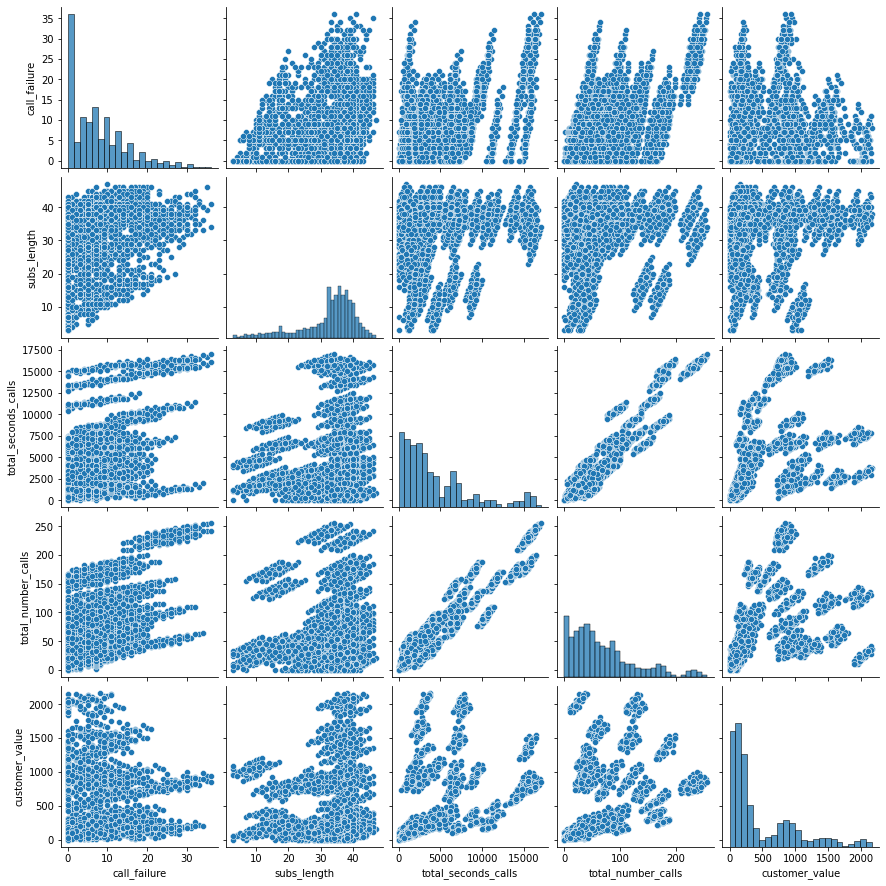

In [ ]:
sns.pairplot(data = df, vars = ["call_failure", "subs_length", "total_seconds_calls", "total_number_calls", "customer_value"])
plt.show()

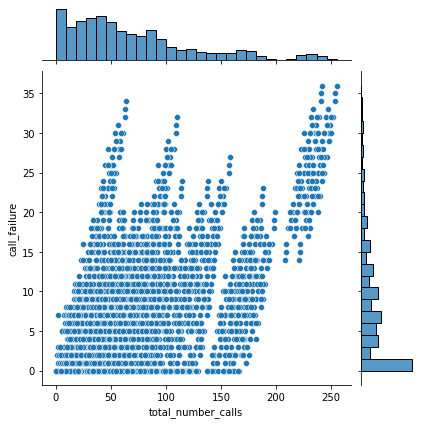

In [ ]:
sns.jointplot(x='total_number_calls', y='call_failure', data=df, kind = 'scatter');

**Corelation, Coefficiant with Heatmap**


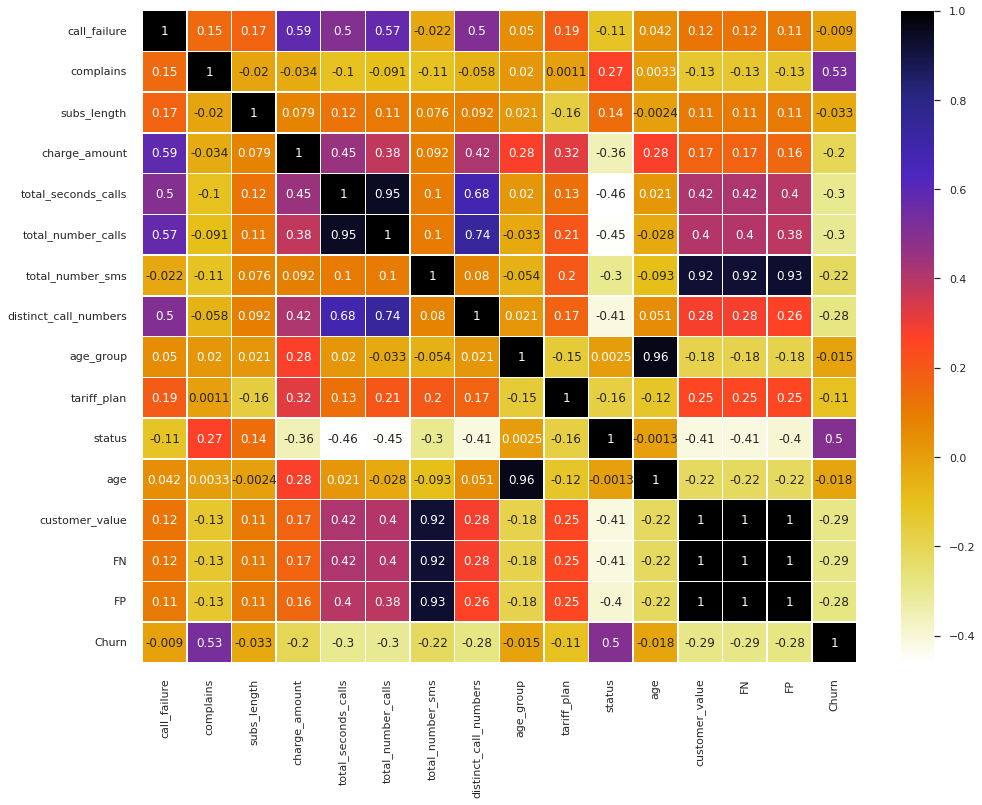

In [ ]:
# calculate the correlation
df_corr = df.corr()

# correlation matrix

plt.figure(figsize=(16,12))
sns.heatmap(df_corr, annot=True, linewidths=.5, cmap = plt.cm.CMRmap_r)
plt.show()

**Correlation matrix plot in order**

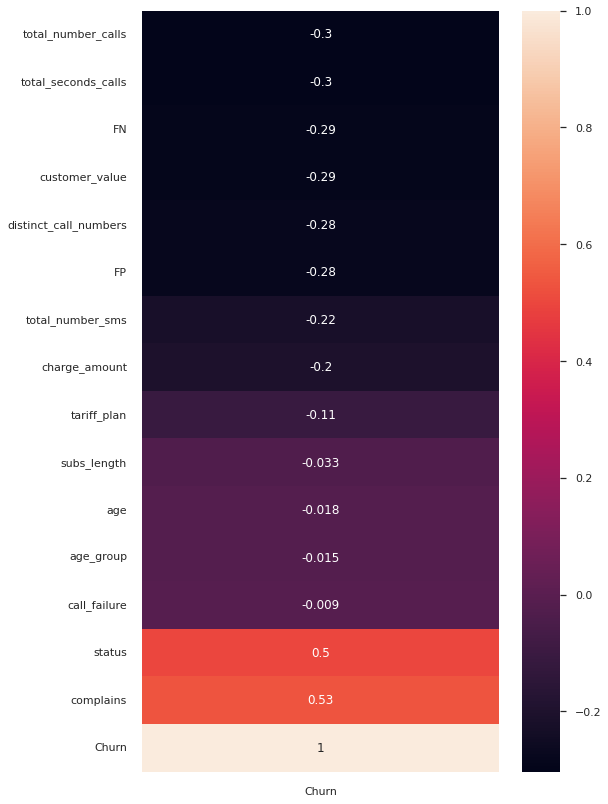

In [ ]:
fig, ax = plt.subplots(figsize=(8,14))
churn_corr = df.corr()[['Churn']].sort_values(
 by='Churn')
sns.heatmap(churn_corr, annot=True, ax=ax)

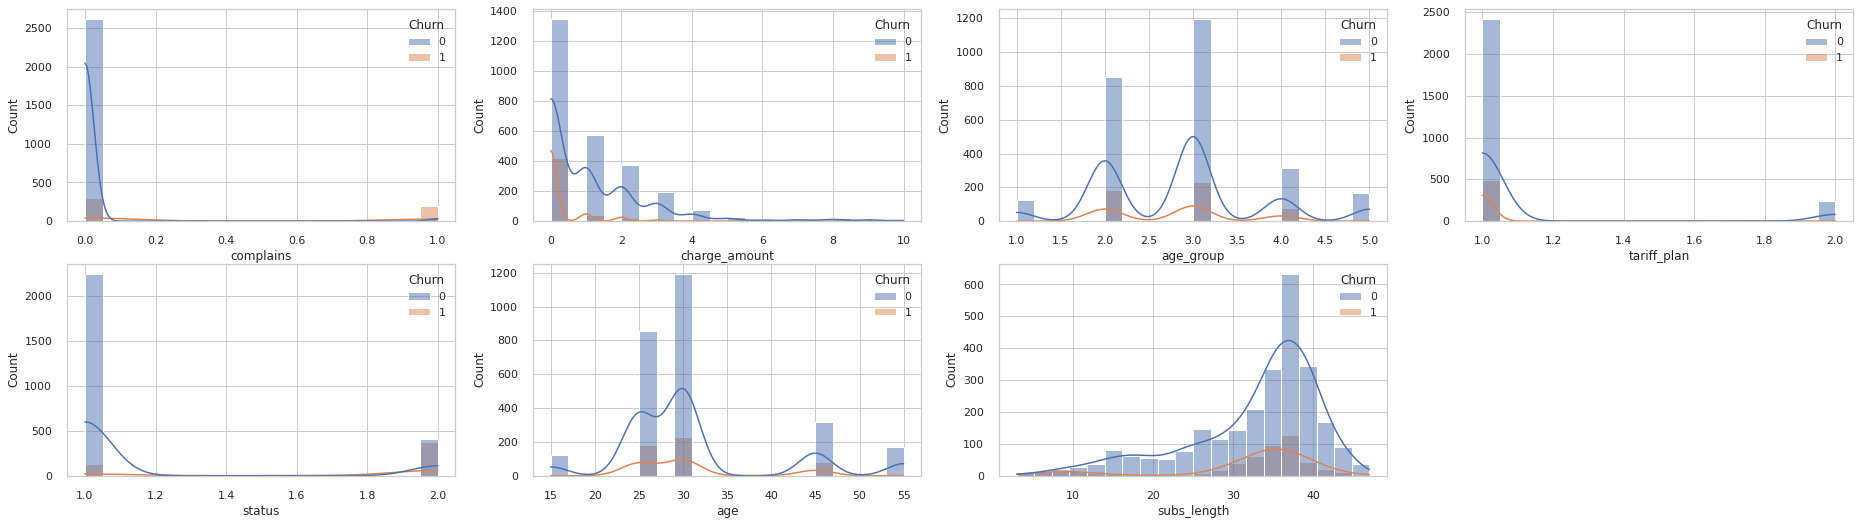

In [ ]:
#for data distribution
import matplotlib


plt.figure(figsize=(32, 32))
matplotlib.rc('axes', titlesize=24)#cols size


feature_col=["complains", "charge_amount", "age_group", "tariff_plan", "status", "age", "subs_length"]
for i, column in enumerate(feature_col, 1):
    plt.subplot(7,4,i)
    fig = sns.histplot(data= df, x=column,hue='Churn',kde=True,bins=20)

    

**Drop the highly correlated columns**

In [ ]:
df=df.drop(columns=["age_group", "FN", "FP"])

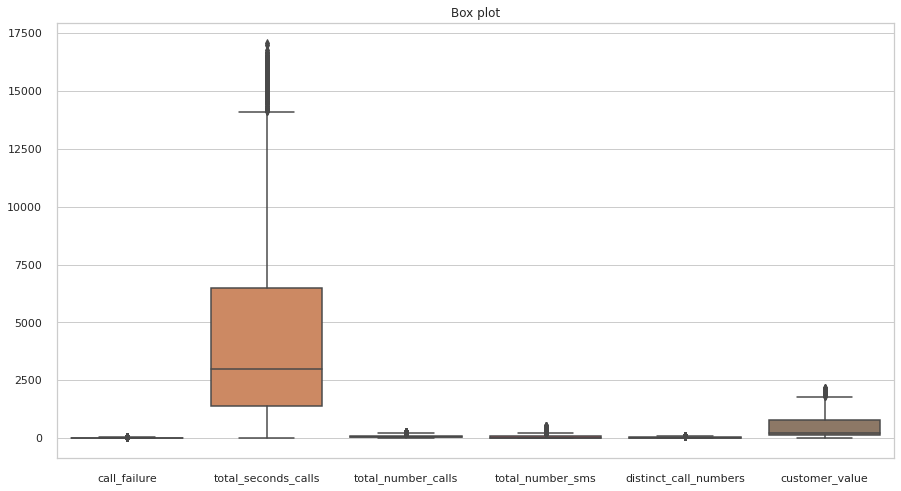

In [ ]:
cont_feature_col=["call_failure", "total_seconds_calls", "total_number_calls", "total_number_sms", "distinct_call_numbers","customer_value"]

sns.set(style="whitegrid")
plt.figure(figsize=(15,8))

sns.boxplot(data=df[cont_feature_col])
plt.title("Box plot")
plt.show()

**Find interquartile** **range**

In [ ]:
outlier_list=[]
total_outlier=[]

Q1 = df[cont_feature_col].quantile(.25)
Q3 = df[cont_feature_col].quantile(.75)
IQR = Q3-Q1

outliers_df = np.logical_or((df[cont_feature_col] < (Q1 - 1.5 * IQR)), (df[cont_feature_col] > (Q3 + 1.5 * IQR))) 

for col in list(outliers_df.columns):
    try:
        total_outlier.append(outliers_df[col].value_counts()[True])
        outlier_list.append((outliers_df[col].value_counts()[True] / outliers_df[col].value_counts().sum()) * 100)
    except:
        outlier_list.append(0)
        total_outlier.append(0)
        
outlier_list

outlier_df = pd.DataFrame(zip(list(outliers_df.columns), total_outlier, outlier_list), columns=['name of the column', 'total', 'outlier(%)'])

#see totally how many outliers in cont features
outlier_df.set_index('name of the column', inplace=True)
#del outlier_df.index.name
outlier_df

,total,outlier(%)
name of the column,,
call_failure,47,1.492063
total_seconds_calls,200,6.349206
total_number_calls,129,4.095238
total_number_sms,368,11.682540
distinct_call_numbers,77,2.444444
customer_value,116,3.682540


In [ ]:
df_cont = df[cont_feature_col]
out_nan_df = df_cont[~outliers_df]
out_nan_df

,call_failure,total_seconds_calls,total_number_calls,total_number_sms,distinct_call_numbers,customer_value
0,8.0,4370.0,71.0,5.0,17.0,197.640
1,0.0,318.0,5.0,7.0,4.0,46.035
2,10.0,2453.0,60.0,NaN,24.0,1536.520
3,10.0,4198.0,66.0,1.0,35.0,240.020
4,3.0,2393.0,58.0,2.0,33.0,145.805
...,...,...,...,...,...,...
3145,21.0,6697.0,147.0,92.0,44.0,721.980
3146,17.0,9237.0,177.0,80.0,42.0,261.210
3147,13.0,3157.0,51.0,38.0,21.0,280.320
3148,7.0,4695.0,46.0,NaN,12.0,1077.640


In [ ]:
for col in cont_feature_col:

  #qq=out_nan_df.dropna()
  
  col_mean=df[col].mean() #calculate mean for each col
  out_nan_df[col]=out_nan_df[col].fillna(col_mean) #first convert outliers to Nan values then fill Nan's with col mean
  #df[cont_feature_col]=df_cont

In [ ]:
out_nan_df

,call_failure,total_seconds_calls,total_number_calls,total_number_sms,distinct_call_numbers,customer_value
0,8.0,4370.0,71.0,5.000000,17.0,197.640
1,0.0,318.0,5.0,7.000000,4.0,46.035
2,10.0,2453.0,60.0,73.174921,24.0,1536.520
3,10.0,4198.0,66.0,1.000000,35.0,240.020
4,3.0,2393.0,58.0,2.000000,33.0,145.805
...,...,...,...,...,...,...
3145,21.0,6697.0,147.0,92.000000,44.0,721.980
3146,17.0,9237.0,177.0,80.000000,42.0,261.210
3147,13.0,3157.0,51.0,38.000000,21.0,280.320
3148,7.0,4695.0,46.0,73.174921,12.0,1077.640


In [ ]:
deneme = df.drop(columns=["call_failure", "total_seconds_calls", "total_number_calls", "total_number_sms", "distinct_call_numbers", "customer_value"])

In [ ]:
#concat cat_df and clear out of outliers cont_df
df=pd.concat([out_nan_df, deneme], axis=1)

In [ ]:
df

,call_failure,total_seconds_calls,total_number_calls,total_number_sms,distinct_call_numbers,customer_value,complains,subs_length,charge_amount,tariff_plan,status,age,Churn
0,8.0,4370.0,71.0,5.000000,17.0,197.640,0,38,0,1,1,30,0
1,0.0,318.0,5.0,7.000000,4.0,46.035,0,39,0,1,2,25,0
2,10.0,2453.0,60.0,73.174921,24.0,1536.520,0,37,0,1,1,30,0
3,10.0,4198.0,66.0,1.000000,35.0,240.020,0,38,0,1,1,15,0
4,3.0,2393.0,58.0,2.000000,33.0,145.805,0,38,0,1,1,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21.0,6697.0,147.0,92.000000,44.0,721.980,0,19,2,2,1,25,0
3146,17.0,9237.0,177.0,80.000000,42.0,261.210,0,17,1,1,1,55,0
3147,13.0,3157.0,51.0,38.000000,21.0,280.320,0,18,4,1,1,30,0
3148,7.0,4695.0,46.0,73.174921,12.0,1077.640,0,11,2,1,1,30,0


In [ ]:
df.to_csv('preProcessedFile.csv')